# Data Bootcamp Final Project : Looking At Happiness across the world


![World Happiness](http://worldhappiness.report/wp-content/uploads/sites/2/2017/03/170320-whr-2017-happy-ppl-ftr.jpg)


### ** Author: William John **

### Email: wj552@nyu.edu

It is hard to quantify Happiness, or rather, it is hard to quantify reasons for happiness.  <br>

"Money cannot buy happiness" is a phrase repeated all over social media.  However, locigally speaking, having money allows citizens of a country to purchase, food, water, and shelter, which would not necessarily make someone more happy, but it would help in ensuring that one is not unhappy. This project uses thee World Happiness Report, released annualy to analyze if welath begets happiness.  


### Data Report

This data is pulled from the [World Happiness Report](http://worldhappiness.report/) and also from the [World Bank](http://www.worldbank.org/). The World Happiness report is a survey of the happiness of countries.  For the purposes of this project, I will be using the report of WHR 2017, released at the United Nations event celebrating the International Day of Happiness on March 20th. which looks at 155 countries and ranks them according to happiness.<br>
Happiness scores are based on the answers to the main life evaluation question asked in the Gallup World Poll, which asks participants to rate their state of life from a scale of 0 to 10 (0 being the worst possible state of life, and 10 being the best).

All of the data is formatted as an excel file, which pandas can directly read with read_excel.  The excel file from the World Happiness Report has 4 sheets but I only need to use Data behind Table 2.1 WHR 2017 and Figure2.2 WHR 2017. 
- Data behind Table 2.1 WHR 2017 is the excel sheet that has Life evauations, Log GDP, Social support, Healthy Life Expectancy, Freedom to make Life Choices, GINI, etc on countries from the year 2008 to 2015.
- Figure2.2 WHR 2017 is a simple excel sheet that has the Happiness score of each countries evaluated by the World Happiness Report 2017.  

### Packages Used

In [351]:
import pandas as pd             # data package
import matplotlib.pyplot as plt # graphics 
import plotly.graph_objs as go #  i use plotly to make nice looking graphs and such
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import gzip                     # Library for reading g zip files. 
import requests, io             # internet and input tools  
import zipfile as zf            # zip file tools 
import shutil                   # file management tools 
import os                       # operating system tools (check files)
import numpy as np

### Data Collection 

#### (Failed zip file grabbing)

Below I try to pull data from kaggle, but it was reading the file as a gzip, and there were a lot of complicaions afterwards, because the type was a gzip, but gzip methods could not be called on the object.

In [149]:
url = "https://www.kaggle.com/unsdsn/world-happiness/downloads/world-happiness-report.zip"

r = requests.get(url) 

# describe response 
print('Response status code:', r.status_code)
print('Response type:', type(r))
print('Response .content:', type(r.content)) 
print('Response headers:\n', r.headers, sep='')

Response status code: 200
Response type: <class 'requests.models.Response'>
Response .content: <class 'bytes'>
Response headers:
{'Cache-Control': 'private', 'Content-Length': '17800', 'Content-Type': 'text/html; charset=utf-8', 'Content-Encoding': 'gzip', 'Vary': 'Accept-Encoding', 'Set-Cookie': '__RequestVerificationToken=mqz-FbdmjJyQH_bWAosSv9a0LyglUDcnmnVjc-pN7K0nTRBFYTj6boBVRz2_zMseZAOBtTbcv0_NYGkQDbPGR4K6j6Q1; path=/; secure; HttpOnly, TempData=; expires=Mon, 20-Nov-2017 23:51:09 GMT; path=/; secure; HttpOnly', 'X-Frame-Options': 'SAMEORIGIN', 'Date': 'Wed, 20 Dec 2017 23:51:08 GMT'}


In [150]:
# convert bytes to zip file  
mlz = gzip.open(io.BytesIO(r.content))
print('Type of zipfile object:', type(mlz))

Type of zipfile object: <class 'gzip.GzipFile'>


####  2017 data from World Happiness Report website (4th Excel Sheet)


I have url to the data and I pull in the data from the excel file online and I only read into my data dataframe the sheet that is named "Figure2.2 WHR 2017".

In [151]:
location ="http://worldhappiness.report/wp-content/uploads/sites/2/2017/03/online-data-chapter-2-whr-2017.xlsx"

data = pd.read_excel(location,sheet_name = "Figure2.2 WHR 2017")

data.dtypes


Country                                        object
Happiness score                               float64
Whisker-high                                  float64
Whisker-low                                   float64
Explained by: GDP per capita                  float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
Dystopia (1.85) + residual                    float64
dtype: object

In [152]:
data.shape

(155, 11)

This is quite a small data set, because only 155 countries are looked at by the WHR

Just for simplicity sake, I want to make sure every column is a string and also show the first 10 rows of the data.

In [153]:

for col in data.columns:
    data[col] = data[col].astype(str)
data.head(10)

,Country,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.85) + residual
0,Norway,7.53700017929,7.59444482058,7.479555538,1.61646318436,1.53352355957,0.796666502953,0.635422587395,0.36201223731,0.315963834524,2.27702665329
1,Denmark,7.52199983597,7.58172806486,7.46227160707,1.48238301277,1.55112159252,0.792565524578,0.62600672245,0.355280488729,0.400770068169,2.31370735168
2,Iceland,7.50400018692,7.62203047305,7.38596990079,1.4806330204,1.61057400703,0.833552122116,0.627162635326,0.475540220737,0.153526559472,2.32271528244
3,Switzerland,7.49399995804,7.56177242041,7.42622749567,1.56497955322,1.51691174507,0.858131289482,0.620070576668,0.290549278259,0.367007285357,2.2767162323
4,Finland,7.46899986267,7.52754207581,7.41045764953,1.44357192516,1.54024672508,0.809157669544,0.617950856686,0.245482772589,0.38261154294,2.4301815033
5,Netherlands,7.37699985504,7.42742584124,7.32657386884,1.50394463539,1.42893922329,0.810696125031,0.585384488106,0.470489829779,0.282661825418,2.29480409622
6,Canada,7.31599998474,7.38440283537,7.24759713411,1.47920441628,1.48134899139,0.834557652473,0.611100912094,0.435539722443,0.287371516228,2.18726444244
7,New Zealand,7.3140001297,7.37951044187,7.24848981753,1.40570604801,1.54819512367,0.816759705544,0.614062130451,0.500005125999,0.382816702127,2.04645633698
8,Sweden,7.28399991989,7.34409487739,7.22390496239,1.49438726902,1.47816216946,0.83087515831,0.612924098969,0.385399252176,0.384398728609,2.09753799438
9,Australia,7.28399991989,7.35665122494,7.21134861484,1.48441493511,1.51004195213,0.84388679266,0.601607382298,0.477699249983,0.301183730364,2.06521081924


here I notice that the countries are ordered from highest happiness score, to lowest so finding the rank is just assignning the index +1 to a new column called "Happiness Rank".

In [439]:
data = data.set_index(data.index +1)

data["Happiness Rank"] = data.index

data.head(10)

,Country,Happiness score,Whisker-high,Whisker-low,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia (1.85) + residual,Happiness Rank
2,Norway,7.53700017929,7.59444482058,7.479555538,1.61646318436,1.53352355957,0.796666502953,0.635422587395,0.36201223731,0.315963834524,2.27702665329,2
3,Denmark,7.52199983597,7.58172806486,7.46227160707,1.48238301277,1.55112159252,0.792565524578,0.62600672245,0.355280488729,0.400770068169,2.31370735168,3
4,Iceland,7.50400018692,7.62203047305,7.38596990079,1.4806330204,1.61057400703,0.833552122116,0.627162635326,0.475540220737,0.153526559472,2.32271528244,4
5,Switzerland,7.49399995804,7.56177242041,7.42622749567,1.56497955322,1.51691174507,0.858131289482,0.620070576668,0.290549278259,0.367007285357,2.2767162323,5
6,Finland,7.46899986267,7.52754207581,7.41045764953,1.44357192516,1.54024672508,0.809157669544,0.617950856686,0.245482772589,0.38261154294,2.4301815033,6
7,Netherlands,7.37699985504,7.42742584124,7.32657386884,1.50394463539,1.42893922329,0.810696125031,0.585384488106,0.470489829779,0.282661825418,2.29480409622,7
8,Canada,7.31599998474,7.38440283537,7.24759713411,1.47920441628,1.48134899139,0.834557652473,0.611100912094,0.435539722443,0.287371516228,2.18726444244,8
9,New Zealand,7.3140001297,7.37951044187,7.24848981753,1.40570604801,1.54819512367,0.816759705544,0.614062130451,0.500005125999,0.382816702127,2.04645633698,9
10,Sweden,7.28399991989,7.34409487739,7.22390496239,1.49438726902,1.47816216946,0.83087515831,0.612924098969,0.385399252176,0.384398728609,2.09753799438,10
11,Australia,7.28399991989,7.35665122494,7.21134861484,1.48441493511,1.51004195213,0.84388679266,0.601607382298,0.477699249983,0.301183730364,2.06521081924,11


I didnt really get any useful information about gdp, because the World Happiness Report's explained by columns are not very clear and they do not do much graphically with the data.  Therefore I used the plotly sites help to create a chloropleth map that graphs all the rankings, and happiness scores of the countries in the dataframe.
https://plot.ly/python/choropleth-maps/#new-to-plotly

### Looking at the Data with chloropleth


In [441]:

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]
# I defined a scale for the gradient to look like.  This uses perentages of the whole scale to partition different slightly
#colors into a gradient

#define what I want to map
vis = dict(type = "choropleth", 
            colorscale = scl, #use my previously defined scale to define the gradient 
            autocolorscale = False,
            locations = data["Country"], #this is how I label the locations
            locationmode = "country names",# define the map
            z = data["Happiness Rank"], #this is how the map will get colored with the scale i made
            text = data["Happiness score"],#when howevering over a country, this is what shows on the however
            reversescale = True, # i wanted the lighter countries to be the less happy, which needs to flip the default scale setup
            colorbar = dict(
            title = "Happiness Rank<br>(Lighter means less happy)") # title of map
          )
#define my layout
layout = dict(
        title = "World Happiness Ranking reports", #Title of the map
        geo = dict(
        showframe = False,#show frame no and show coastlines no
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
        )
)
#after formatting everything, actually print the map out to console
choromap = go.Figure(data = [vis], layout=layout)
iplot(choromap)


The darker, happier countries are more prevalent in the west and in eastern europe/australia. This is aligns with richer countires being happier because they are usually more wealthy nations.  However, I need to pull more data to actually quantitavely explore this


####  2017 data from World Happiness Report website (1st Excel Sheet)

In [287]:
location ="http://worldhappiness.report/wp-content/uploads/sites/2/2017/03/online-data-chapter-2-whr-2017.xlsx"

data2 = pd.read_excel(location,sheet_name = "Data behind Table 2.1 WHR 2017")
data2.columns


Index(['WP5 Country', 'country', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-13',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be t

- Life Ladder is what the people rated how happy they were from a scale of 0 to 10 using the Cantril Ladder. 
- Social support is the national average of the responses (yes or no, 1 or 0) of the question, “If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not?” asked in the Callup World Poll.
- Freedom to make life choices is the average of the responses to the Gallup World Poll question, "Are you satisfied or disatisfied with your freedom to choose what you do with your life?"(yes or no, 1 or 0)
- Perceptions of corruption are the average of binary answers to the questions, “Is corruption widespread throughout the government or not?” and “Is corruption widespread within businesses or not?”.

In [288]:
data2.shape

(1420, 27)

In [289]:
data2.head(10)

,WP5 Country,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-13","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,Afghanistan,2013,3.572100,7.536999,0.483552,49.023087,0.577955,0.075186,0.823204,...,NaN,NaN,0.304368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,Afghanistan,2014,3.130896,7.519704,0.525568,49.305813,0.508514,0.118934,0.871242,...,NaN,NaN,0.413974,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,Afghanistan,2015,3.982855,7.506759,0.528597,49.588539,0.388928,0.094635,0.880638,...,NaN,NaN,0.596918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,Afghanistan,2016,4.220169,7.497288,0.559072,49.871265,0.522566,0.057393,0.793246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Albania,Albania,2007,4.634252,8.984322,0.821372,67.169853,0.528605,-0.007585,0.874700,...,NaN,0.305,NaN,NaN,NaN,NaN,0.243243,0.232,NaN,NaN


This excel sheet is marketly bigger as it has more years of data and more columns.  With this sheet, I can average the Life Ladder, Log GDP per capita, Social Support, Health life expectancy, Confidence in Government, over the years and graph those values to see how they affect happiness

In [290]:
grouped = data2.groupby("country")

AverageLifeLadder = grouped['Life Ladder'].agg(["count","mean"])

AverageLifeLadder["Number of Years"]=AverageLifeLadder["count"]

AverageLifeLadder["Life Ladder Average"]=AverageLifeLadder["mean"]

del AverageLifeLadder["count"]
del AverageLifeLadder["mean"]

AverageLifeLadder.head()

,Number of Years,Life Ladder Average
country,,
Afghanistan,9,3.933825
Albania,9,5.027596
Algeria,5,5.625685
Angola,4,4.420299
Argentina,11,6.439476


Calculate the average, and then concatenate them into one data frame for easy graphing

In [291]:

AverageGDP = grouped['Log GDP per capita'].agg(["mean"])
AverageGDP["Average Log GDP per capita"]=AverageGDP["mean"]
del AverageGDP["mean"]

AverageSocialSupp = grouped['Social support'].agg(["mean"])
AverageSocialSupp["Average Social Support"]=AverageSocialSupp["mean"]
del AverageSocialSupp["mean"]

AverageLife = grouped['Healthy life expectancy at birth'].agg(["mean"])
AverageLife["Average Life Expectancy"]=AverageLife["mean"]
del AverageLife["mean"]

AverageConf = grouped['Perceptions of corruption'].agg(["mean"])
AverageConf["Average Perceptions of Corruption"]=AverageConf["mean"]
del AverageConf["mean"]

bigdata = pd.concat([AverageLifeLadder, AverageGDP,AverageSocialSupp,AverageLife,AverageConf], axis = 1)
bigdata.head()

,Number of Years,Life Ladder Average,Average Log GDP per capita,Average Social Support,Average Life Expectancy,Average Perceptions of Corruption
country,,,,,,
Afghanistan,9,3.933825,7.447978,0.520064,48.727537,0.812616
Albania,9,5.027596,9.172559,0.732704,67.999568,0.857864
Algeria,5,5.625685,9.498361,0.803993,64.117065,0.648712
Angola,4,4.420299,8.816016,0.737973,44.572942,0.867018
Argentina,11,6.439476,9.658498,0.906024,66.701826,0.844310


Plot the average Life Ladder results and the Average Log GDP per capita

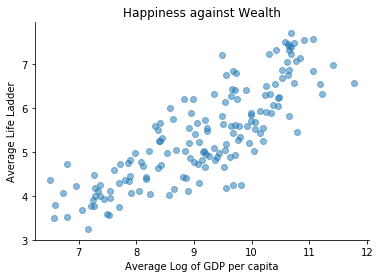

In [292]:
fig, ax = plt.subplots() 

ax.scatter(bigdata["Average Log GDP per capita"], bigdata["Life Ladder Average"], 
            alpha= 0.50) 
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.set_title("Happiness against Wealth") 
ax.set_ylabel("Average Life Ladder")
ax.set_xlabel("Average Log of GDP per capita")


plt.show()

From this graph it would seem that a higher GDP is correlated to a higher Happiness "Life Ladder" to see the other indicators and their plots against the Life Ladder, I plot them side by side below.

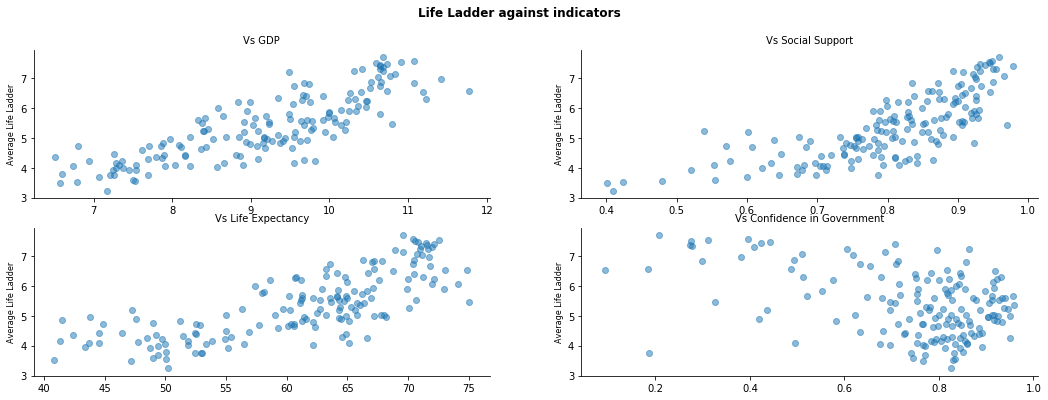

In [293]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, sharex = False, figsize = (18,6))

ax = ax.ravel()

var_list = ["Average Log GDP per capita","Average Social Support", "Average Life Expectancy", "Average Perceptions of Corruption"]
nice_name = ["Vs GDP", "Vs Social Support", "Vs Life Expectancy", "Vs Confidence in Government"]

count = 0

for x in ax:
    
    x.scatter(bigdata[var_list[count]],bigdata["Life Ladder Average"], alpha= 0.50)
    
    x.set_title(nice_name[count], fontsize = 10) 
    
    x.spines["right"].set_visible(False) 
    
    x.spines["top"].set_visible(False)
    
    x.set_ylabel("Average Life Ladder", fontsize = 8)     
      
    count = count + 1
    
fig.suptitle("Life Ladder against indicators", fontsize = 12, fontweight = "bold") # big titel


plt.show()

These graphs indicate that the life expectancy, GDP, and Social Support are directly correlated to the average Life Ladder reported by people of a specific country between 2008 and 2017.

I need a sanity check to see the correlations.

In [294]:
corr_mat = bigdata.corr()
corr_mat

,Number of Years,Life Ladder Average,Average Log GDP per capita,Average Social Support,Average Life Expectancy,Average Perceptions of Corruption
Number of Years,1.000000,0.150697,0.123899,0.201111,0.312062,0.069416
Life Ladder Average,0.150697,1.000000,0.824259,0.759044,0.762103,-0.438427
Average Log GDP per capita,0.123899,0.824259,1.000000,0.713051,0.829720,-0.382046
Average Social Support,0.201111,0.759044,0.713051,1.000000,0.627476,-0.217053
Average Life Expectancy,0.312062,0.762103,0.829720,0.627476,1.000000,-0.298834
Average Perceptions of Corruption,0.069416,-0.438427,-0.382046,-0.217053,-0.298834,1.000000


The correlation of Average Log GDP per capita is indeed quite high and the highest out of all the other indicators.

Maybe finding the average is not accurate enough, we need more information. For example, people in an area can be "sad", as in they are more inclined to say that they are sad in surveys. Also, it is hard to quantify how happy you are if you are not sure of the boundaries, everyone has different base cases and levels throughout the day.  

### Look at Percentage change over years

I want to read in the data again and also clean it up a bit so I can look at only the things I want.

In [391]:
location ="http://worldhappiness.report/wp-content/uploads/sites/2/2017/03/online-data-chapter-2-whr-2017.xlsx"

data2 = pd.read_excel(location,sheet_name = "Data behind Table 2.1 WHR 2017")
data2.columns

data2 = data2.set_index("year")
del data2["country"]
s = data2.iloc[:,0:4]
s.head(10)



,WP5 Country,Life Ladder,Log GDP per capita,Social support
year,,,,
2008,Afghanistan,3.723590,7.197130,0.450662
2009,Afghanistan,4.401778,7.362664,0.552308
2010,Afghanistan,4.758381,7.416260,0.539075
2011,Afghanistan,3.831719,7.445761,0.521104
2012,Afghanistan,3.782938,7.549241,0.520637
2013,Afghanistan,3.572100,7.536999,0.483552
2014,Afghanistan,3.130896,7.519704,0.525568
2015,Afghanistan,3.982855,7.506759,0.528597
2016,Afghanistan,4.220169,7.497288,0.559072


In [392]:


s["Life Ladder Growth"] = s["Life Ladder"].pct_change()
s["Log GDP per capita Growth"] = s["Log GDP per capita"].pct_change()
    
s

,WP5 Country,Life Ladder,Log GDP per capita,Social support,Life Ladder Growth,Log GDP per capita Growth
year,,,,,,
2008,Afghanistan,3.723590,7.197130,0.450662,NaN,NaN
2009,Afghanistan,4.401778,7.362664,0.552308,0.182133,0.023000
2010,Afghanistan,4.758381,7.416260,0.539075,0.081013,0.007279
2011,Afghanistan,3.831719,7.445761,0.521104,-0.194743,0.003978
2012,Afghanistan,3.782938,7.549241,0.520637,-0.012731,0.013898
2013,Afghanistan,3.572100,7.536999,0.483552,-0.055734,-0.001622
2014,Afghanistan,3.130896,7.519704,0.525568,-0.123514,-0.002295
2015,Afghanistan,3.982855,7.506759,0.528597,0.272114,-0.001721
2016,Afghanistan,4.220169,7.497288,0.559072,0.059584,-0.001262


Mistakes were made because pandas has no idea that there were different countries in the rows and it calculated percentage changes between countires through a leap back in time(2016 Afghanistan to 2007 Albania).I can try to iterate over the dataset to do percentages for each country.

Below I go through the list of countries and then I add the percentage change of each country's GDP to a series, after that I add that to the dataframe we had before named s


In [399]:
listOfCountries=s["WP5 Country"].unique()

a = s[s['WP5 Country'] == "Afghanistan"]["Log GDP per capita"].pct_change()

for i in listOfCountries:
    if i == "Afghanistan":
        continue
    else:
        a = pd.concat([a,s[s['WP5 Country'] == i]["Log GDP per capita"].pct_change()], axis=0)
s['Log GDP per capita Growth'] = pd.Series(a, index=s.index)

b = s[s['WP5 Country'] == "Afghanistan"]["Life Ladder"].pct_change()

for i in listOfCountries:
    if i == "Afghanistan":
        continue
    else:
        b = pd.concat([b,s[s['WP5 Country'] == i]["Life Ladder"].pct_change()], axis=0)
s['Life Ladder Growth'] = pd.Series(b, index=s.index)
s

,WP5 Country,Life Ladder,Log GDP per capita,Social support,Life Ladder Growth,Log GDP per capita Growth
year,,,,,,
2008,Afghanistan,3.723590,7.197130,0.450662,NaN,NaN
2009,Afghanistan,4.401778,7.362664,0.552308,0.182133,0.023000
2010,Afghanistan,4.758381,7.416260,0.539075,0.081013,0.007279
2011,Afghanistan,3.831719,7.445761,0.521104,-0.194743,0.003978
2012,Afghanistan,3.782938,7.549241,0.520637,-0.012731,0.013898
2013,Afghanistan,3.572100,7.536999,0.483552,-0.055734,-0.001622
2014,Afghanistan,3.130896,7.519704,0.525568,-0.123514,-0.002295
2015,Afghanistan,3.982855,7.506759,0.528597,0.272114,-0.001721
2016,Afghanistan,4.220169,7.497288,0.559072,0.059584,-0.001262


It took a substantial amount of time but now we have the percentage change that also accounts for the countries changing throughout the data set.(you can see the NaN value when a new country starts) 


Lets graph it now!

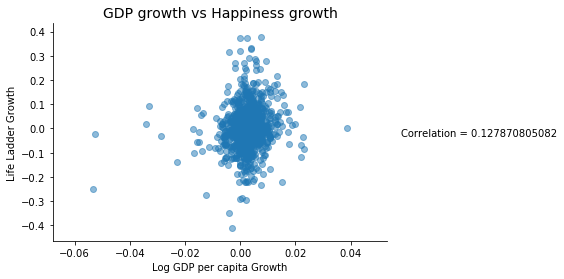

In [428]:
fig, ax = plt.subplots()

ax.scatter(s["Log GDP per capita Growth"], s["Life Ladder Growth"],     
            alpha= 0.50)

corr_mat = s.corr() 
cr = corr_mat["Life Ladder Growth"]["Log GDP per capita Growth"]

message = "Correlation = " + str(cr) 
ax.text(.115,-.03, message, horizontalalignment='right')
ax.set_title('GDP growth vs Happiness growth',  fontsize=14,) 


ax.set_xlabel("Log GDP per capita Growth")
ax.set_ylabel("Life Ladder Growth")

ax.spines["right"].set_visible(False) 

ax.spines["top"].set_visible(False)

plt.show()

In our Graph here we do not see much correlation between growth of GDP and growth of Happiness. This means that a change in GDP whether positive or negative will not affect the overall happiness of a person.  The graphs below showed that more GDP meant more Happiness, and this shows that changing GDP does not really affect change in Happiness. This leads me to believe in a few theories; that GDP is related to previously accumulated wealth, accumulated steadily, so, already having a higher GDP or already having wealth contributes more to happiness than quickly acquiring it.  It also makes me believe that living in a richer country will make you more happy then living in a rapidly developing country.

### Conclusion

In Conclusion, a higher GDP generally correlates with a higher happiness score and ranking

In the graph of Log GDP per capita vs Life Ladder, there was a clear association between a high GDP and higher Happines score.  The correlation calculated was 0.824259 which was rather high.<br>
However, Social Support and Life Expectancy also had high, but not as high correlations to GDP.  Furthermore, Social support and Life Expectany are more factors that are effected by and affect GDP.<br>
This does not detract from the fact that more rich countries based on GDP per capita are more happy.